Mengimport Semua Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,balanced_accuracy_score

In [2]:
"https://github.com/LaOdeMuhammadMaulidin/Diabetes_RF/blob/main/dataset_diabetes_bahasa_indonesia%20(1).csv"

'https://github.com/LaOdeMuhammadMaulidin/Diabetes_RF/blob/main/dataset_diabetes_bahasa_indonesia%20(1).csv'

Load Dataset

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/LaOdeMuhammadMaulidin/Diabetes_RF/main/dataset_diabetes_bahasa_indonesia%20(1).csv")
df.head()

,Diabetes_012,gula_darah_12_bulan,BMI,Smoker,PhysActivity,buah_harian,sayur_harian,HvyAlcoholConsump,hari_minum_manis,hari_makan_manis,akses_kesehatan,masalah_mental,riwayat_genetik,jenis_kelamin,kategori_usia,pendidikan,pendapatan
0,0.0,1,40.0,1.0,0.0,1,1,0.0,2,2,1,17,0,0,2,6,5
1,0.0,0,25.0,1.0,1.0,1,1,0.0,4,2,1,1,0,0,1,5,8
2,0.0,0,28.0,0.0,0.0,1,0,0.0,4,1,1,26,0,1,9,2,1
3,0.0,1,27.0,0.0,1.0,0,0,0.0,6,3,1,6,0,0,5,2,1
4,0.0,0,24.0,0.0,1.0,1,1,0.0,5,5,1,24,0,1,13,4,4


Memperbarui Nama Kolom yang Ada

In [4]:
col_names = ['resiko_diabetes', 'gula_darah_12_bulan', 'BMI','Perokok', 'Aktivitas_Fisik', 'Buah_Harian', 'Sayur_harian', 'Alkohol_Berat', 'hari_minum_manis', 'hari_makan_manis',
             'akses_kesehatan', 'masalah_mental', 'riwayat_genetik','jenis_kelamin', 'Usia', 'Pendidikan', 'Pendapatan']


df.columns = col_names
print (f'Nama Kolom Yang Telah di Perbarui {col_names}')

df.head()

Nama Kolom Yang Telah di Perbarui ['resiko_diabetes', 'gula_darah_12_bulan', 'BMI', 'Perokok', 'Aktivitas_Fisik', 'Buah_Harian', 'Sayur_harian', 'Alkohol_Berat', 'hari_minum_manis', 'hari_makan_manis', 'akses_kesehatan', 'masalah_mental', 'riwayat_genetik', 'jenis_kelamin', 'Usia', 'Pendidikan', 'Pendapatan']


,resiko_diabetes,gula_darah_12_bulan,BMI,Perokok,Aktivitas_Fisik,Buah_Harian,Sayur_harian,Alkohol_Berat,hari_minum_manis,hari_makan_manis,akses_kesehatan,masalah_mental,riwayat_genetik,jenis_kelamin,Usia,Pendidikan,Pendapatan
0,0.0,1,40.0,1.0,0.0,1,1,0.0,2,2,1,17,0,0,2,6,5
1,0.0,0,25.0,1.0,1.0,1,1,0.0,4,2,1,1,0,0,1,5,8
2,0.0,0,28.0,0.0,0.0,1,0,0.0,4,1,1,26,0,1,9,2,1
3,0.0,1,27.0,0.0,1.0,0,0,0.0,6,3,1,6,0,0,5,2,1
4,0.0,0,24.0,0.0,1.0,1,1,0.0,5,5,1,24,0,1,13,4,4


MEMERIKSA MISSING VALUE

In [5]:
print(f"Jumlah Missing Value: {df.isnull().sum().sum()}")

Jumlah Missing Value: 0


In [6]:
df.describe()

,resiko_diabetes,gula_darah_12_bulan,BMI,Perokok,Aktivitas_Fisik,Buah_Harian,Sayur_harian,Alkohol_Berat,hari_minum_manis,hari_makan_manis,akses_kesehatan,masalah_mental,riwayat_genetik,jenis_kelamin,Usia,Pendidikan,Pendapatan
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.400832,28.382364,0.443169,0.756544,0.600028,0.502338,0.056197,3.501332,3.494903,0.800146,14.997343,0.301596,0.499618,6.997047,3.500859,4.506272
std,0.698160,0.490068,6.608694,0.496761,0.429169,0.489893,0.499996,0.230302,2.293020,2.293020,0.399891,8.959816,0.458952,0.500001,3.737202,1.707533,2.289895
min,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,7.000000,0.000000,0.000000,4.000000,2.000000,3.000000
50%,0.000000,0.000000,27.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,15.000000,0.000000,0.000000,7.000000,4.000000,5.000000
75%,0.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,1.000000,23.000000,1.000000,1.000000,10.000000,5.000000,7.000000
max,2.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000,1.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


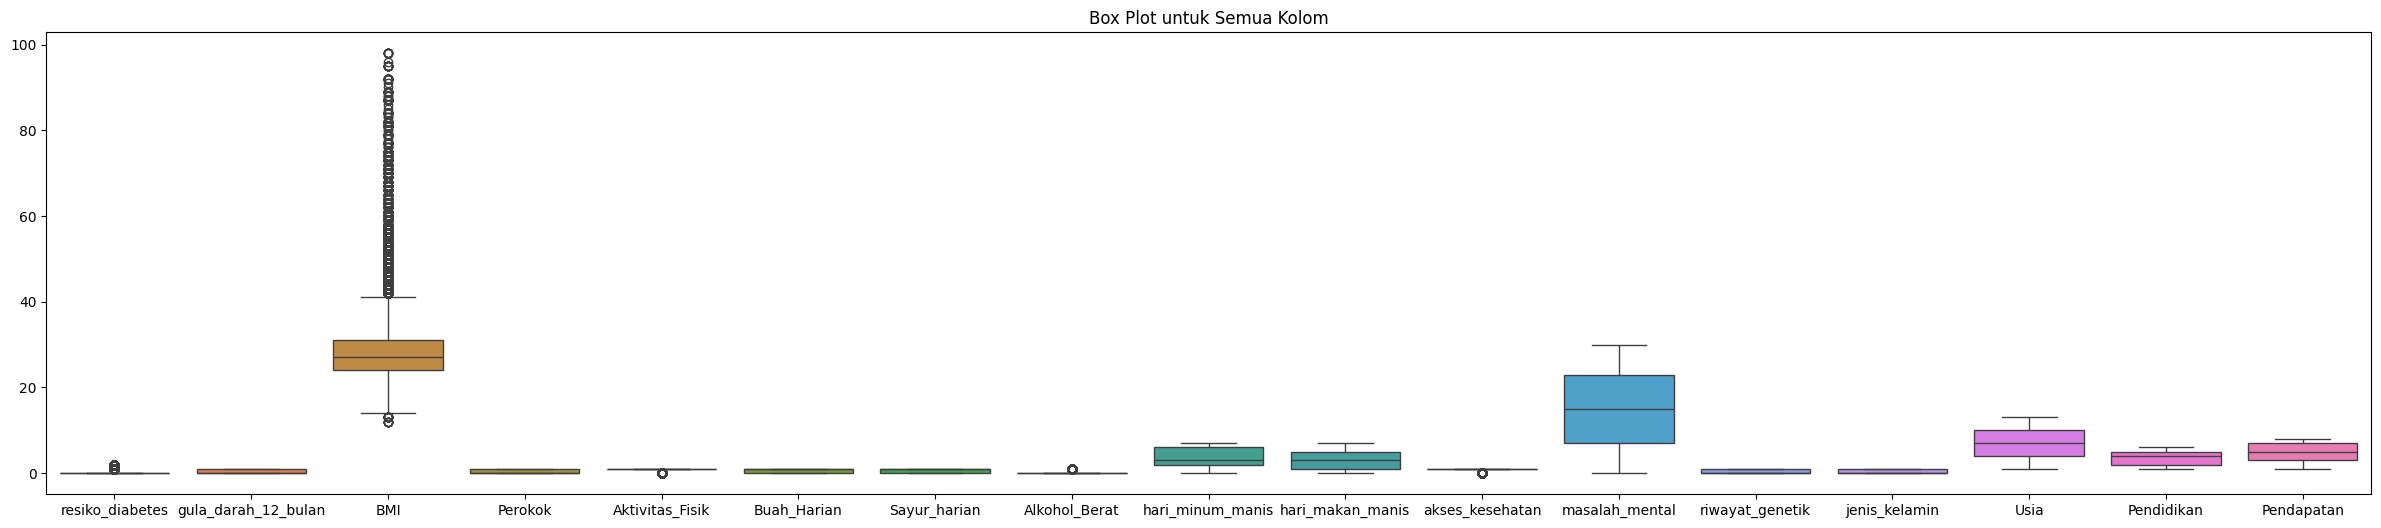

In [7]:
plt.figure(figsize=(30, 6))
sns.boxplot(df)
plt.title('Box Plot untuk Semua Kolom')
plt.show()

In [8]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df < lower_bound) | (df > upper_bound)].index
    return outlier_indices

for column in df.columns:
    outlier_indices = detect_outliers_iqr(df[column])
    if len(outlier_indices) > 0:
        print(f"Outlier IQR pada kolom '{column}' di indeks: {outlier_indices}")

Outlier IQR pada kolom 'resiko_diabetes' di indeks: Index([     8,     10,     13,     17,     23,     26,     27,     28,     30,
           34,
       ...
       253630, 253636, 253652, 253659, 253664, 253666, 253668, 253670, 253676,
       253679],
      dtype='int64', length=39977)
Outlier IQR pada kolom 'BMI' di indeks: Index([    85,     97,    156,    188,    201,    203,    216,    294,    321,
          332,
       ...
       253370, 253382, 253402, 253477, 253482, 253547, 253557, 253567, 253673,
       253675],
      dtype='int64', length=9847)
Outlier IQR pada kolom 'Aktivitas_Fisik' di indeks: Index([     0,      2,      6,      8,      9,     11,     12,     13,     18,
           19,
       ...
       253666, 253667, 253668, 253669, 253670, 253671, 253674, 253675, 253676,
       253678],
      dtype='int64', length=61760)
Outlier IQR pada kolom 'Alkohol_Berat' di indeks: Index([    19,     56,     78,     84,     92,    116,    144,    148,    184,
          202,
       .

In [9]:
'''df['Aktivitas_Fisik_sqrt'] = np.sqrt(df['Aktivitas_Fisik'])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Aktivitas_Fisik_sqrt'], kde=True)
plt.title('Distribusi Aktivitas Fisik (Square Root)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Aktivitas_Fisik_sqrt'])
plt.title('Box Plot Aktivitas Fisik (Square Root)')
plt.show()'''

"df['Aktivitas_Fisik_sqrt'] = np.sqrt(df['Aktivitas_Fisik'])\n\nplt.figure(figsize=(10, 4))\nplt.subplot(1, 2, 1)\nsns.histplot(df['Aktivitas_Fisik_sqrt'], kde=True)\nplt.title('Distribusi Aktivitas Fisik (Square Root)')\n\nplt.subplot(1, 2, 2)\nsns.boxplot(x=df['Aktivitas_Fisik_sqrt'])\nplt.title('Box Plot Aktivitas Fisik (Square Root)')\nplt.show()"

In [10]:
'''plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Aktivitas_Fisik'], kde=True)
plt.title('Distribusi Aktivitas Fisik (Sebelum)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Aktivitas_Fisik'])
plt.title('Box Plot Aktivitas Fisik (Sebelum)')
plt.show()

# Transformasi logaritmik (perlu menangani nilai 0 atau negatif jika ada)
df['Aktivitas_Fisik_log'] = np.log(df['Aktivitas_Fisik'])

# Visualisasi setelah transformasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Aktivitas_Fisik_log'], kde=True)
plt.title('Distribusi Aktivitas Fisik (Log)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Aktivitas_Fisik_log'])
plt.title('Box Plot Aktivitas Fisik (Log)')
plt.show()'''

"plt.figure(figsize=(10, 4))\nplt.subplot(1, 2, 1)\nsns.histplot(df['Aktivitas_Fisik'], kde=True)\nplt.title('Distribusi Aktivitas Fisik (Sebelum)')\n\nplt.subplot(1, 2, 2)\nsns.boxplot(x=df['Aktivitas_Fisik'])\nplt.title('Box Plot Aktivitas Fisik (Sebelum)')\nplt.show()\n\n# Transformasi logaritmik (perlu menangani nilai 0 atau negatif jika ada)\ndf['Aktivitas_Fisik_log'] = np.log(df['Aktivitas_Fisik'])\n\n# Visualisasi setelah transformasi\nplt.figure(figsize=(10, 4))\nplt.subplot(1, 2, 1)\nsns.histplot(df['Aktivitas_Fisik_log'], kde=True)\nplt.title('Distribusi Aktivitas Fisik (Log)')\n\nplt.subplot(1, 2, 2)\nsns.boxplot(x=df['Aktivitas_Fisik_log'])\nplt.title('Box Plot Aktivitas Fisik (Log)')\nplt.show()"

<Axes: >

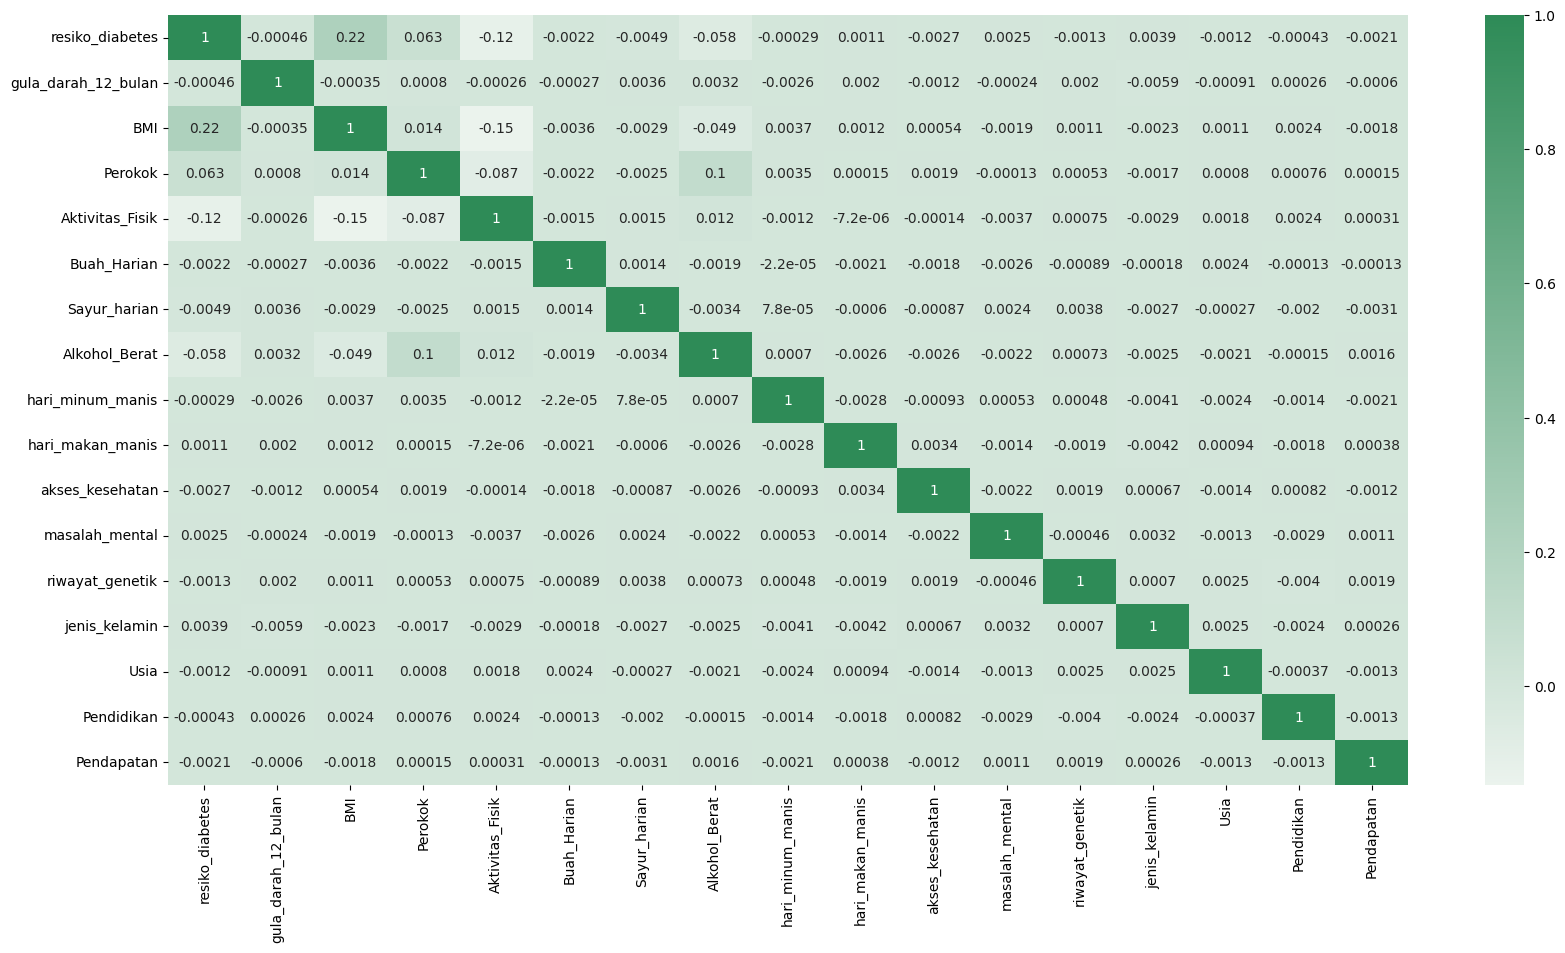

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap =(sns.light_palette("seagreen", as_cmap=True)) )

Memeriksa Data Duplikat

In [12]:
dup = df.duplicated().sum()
print(f' Jumlah Data Duplikasi = {dup}')

 Jumlah Data Duplikasi = 11


In [13]:
new = df.drop_duplicates(inplace=True)
print(f' Jumlah Data Duplikasi baru = {new}')

 Jumlah Data Duplikasi baru = None


In [14]:
print(f"\nUkuran Dataset: {df.shape[0]} baris, {df.shape[1]} kolom")


Ukuran Dataset: 253669 baris, 17 kolom


In [15]:
print("Distribusi Kelas Target:")
print(df['resiko_diabetes'].value_counts())

target_percentages = df['resiko_diabetes'].value_counts(normalize=True) * 100
print("\nPercentasi Setiap Kelas:")
print(target_percentages)

Distribusi Kelas Target:
resiko_diabetes
0.0    213693
2.0     35345
1.0      4631
Name: count, dtype: int64

Percentasi Setiap Kelas:
resiko_diabetes
0.0    84.240881
2.0    13.933512
1.0     1.825607
Name: proportion, dtype: float64


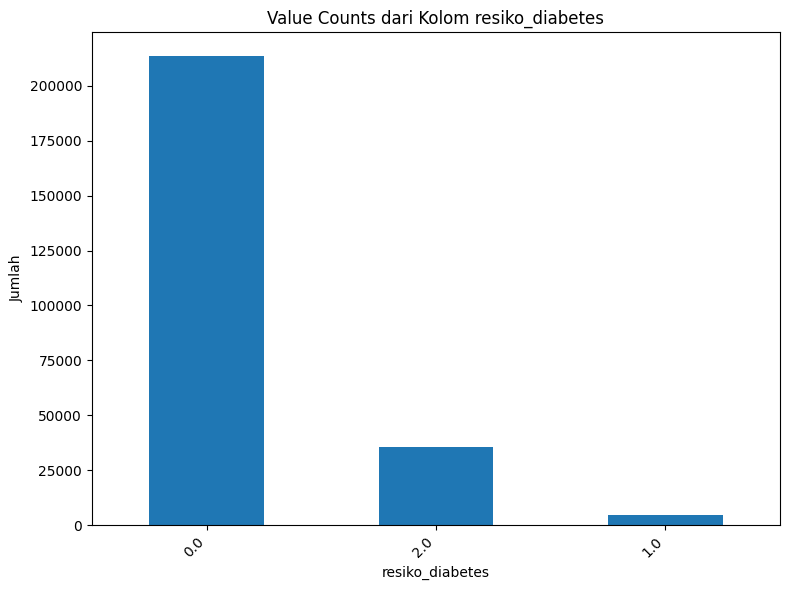

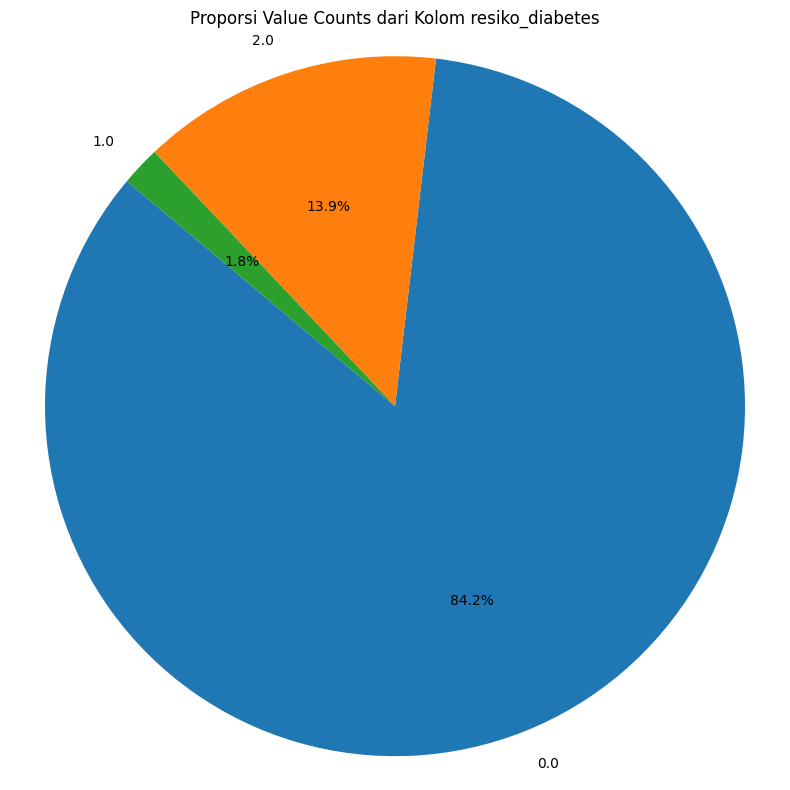

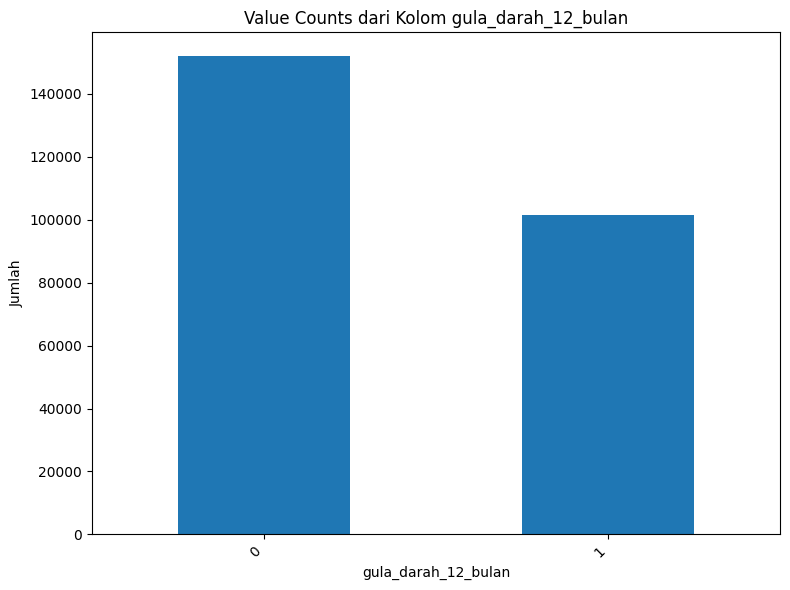

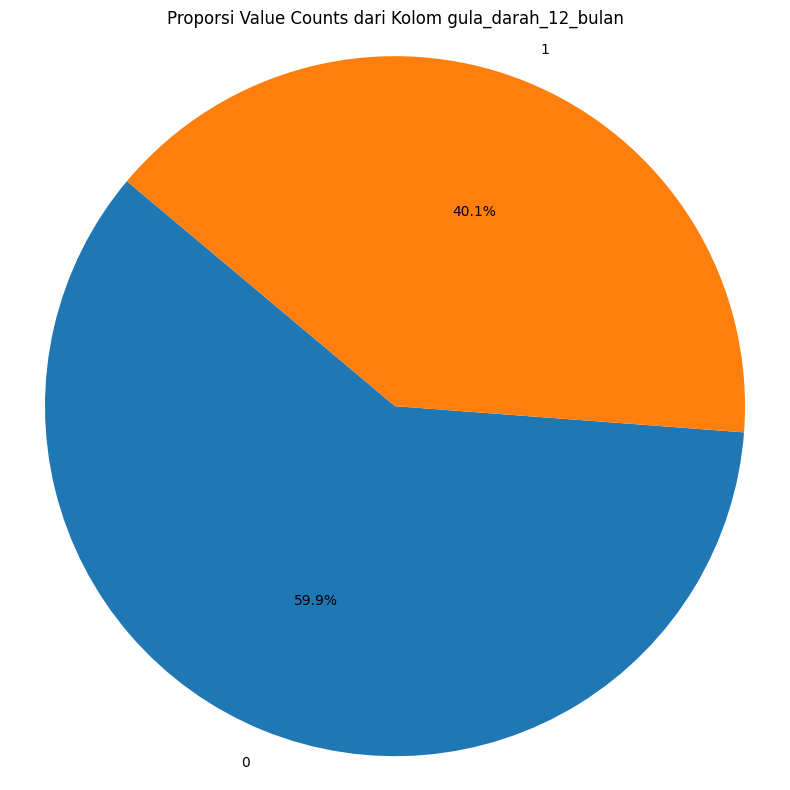

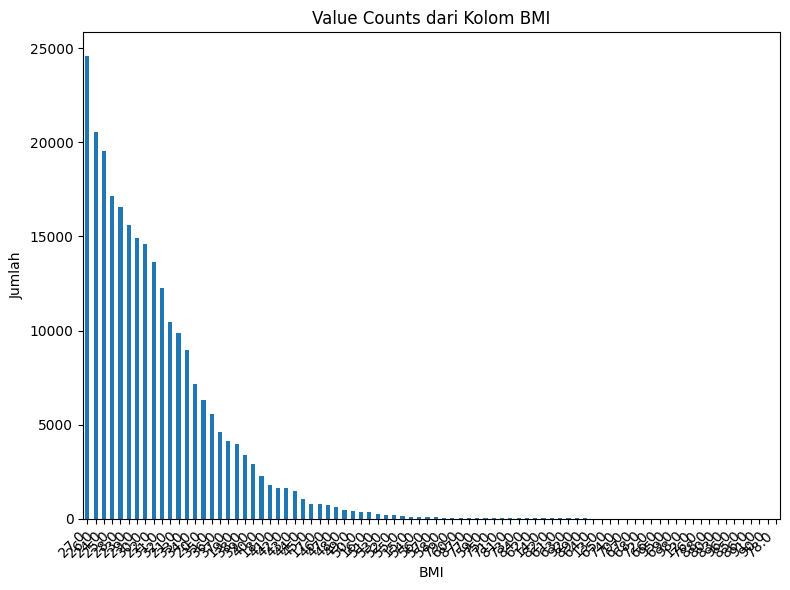

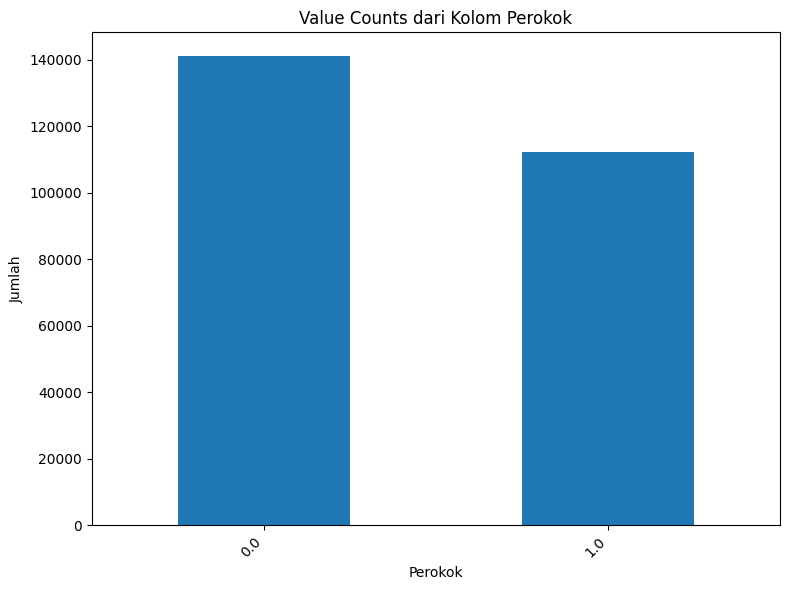

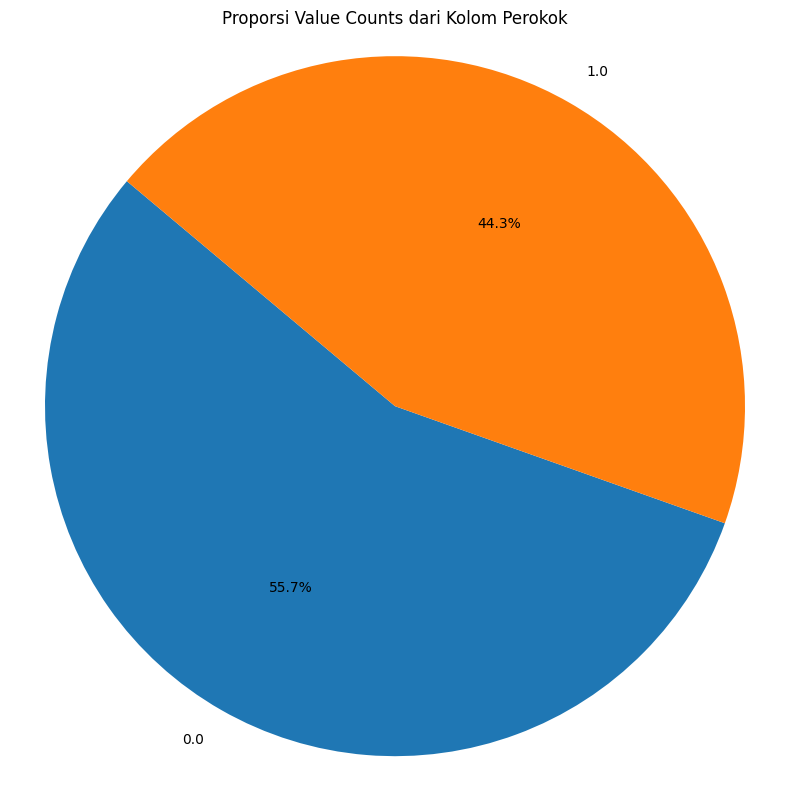

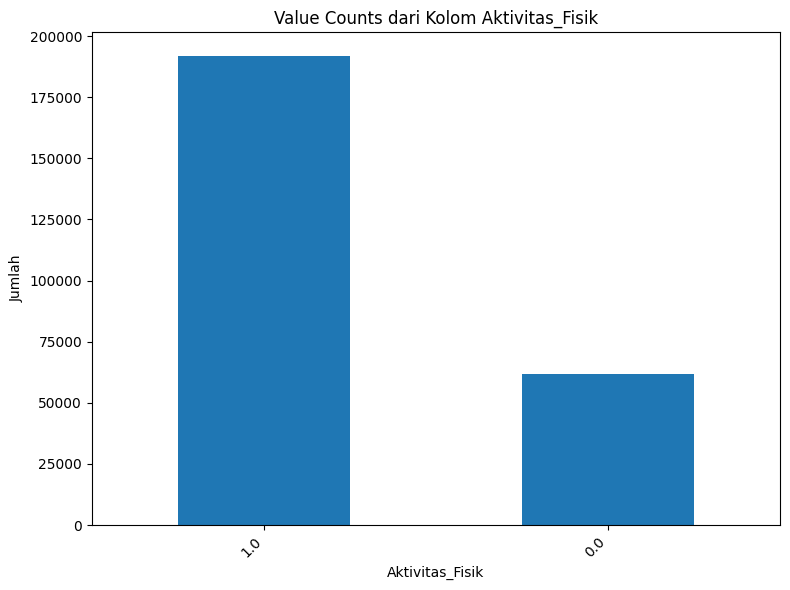

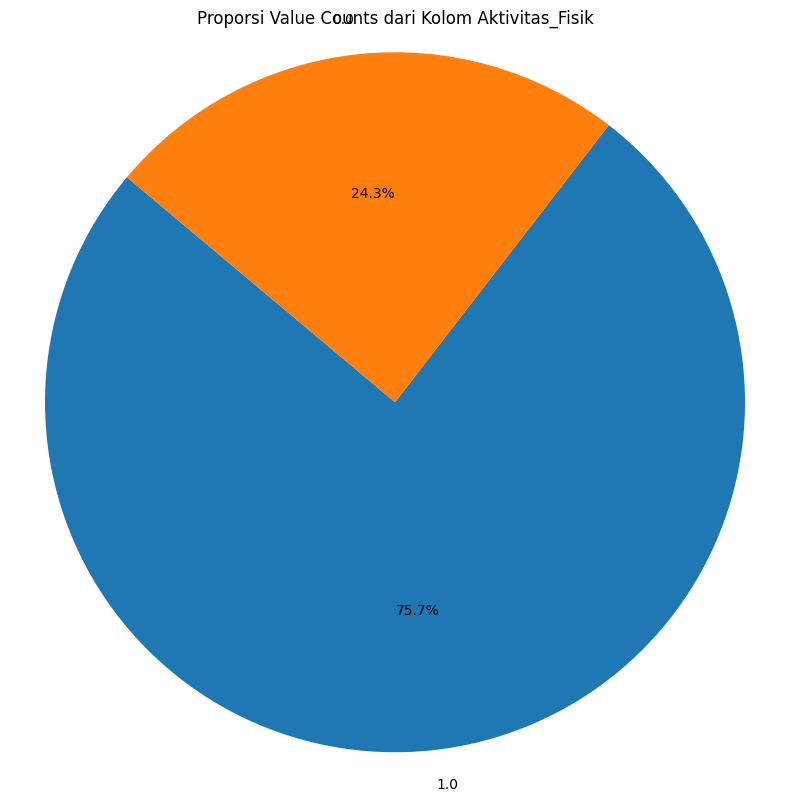

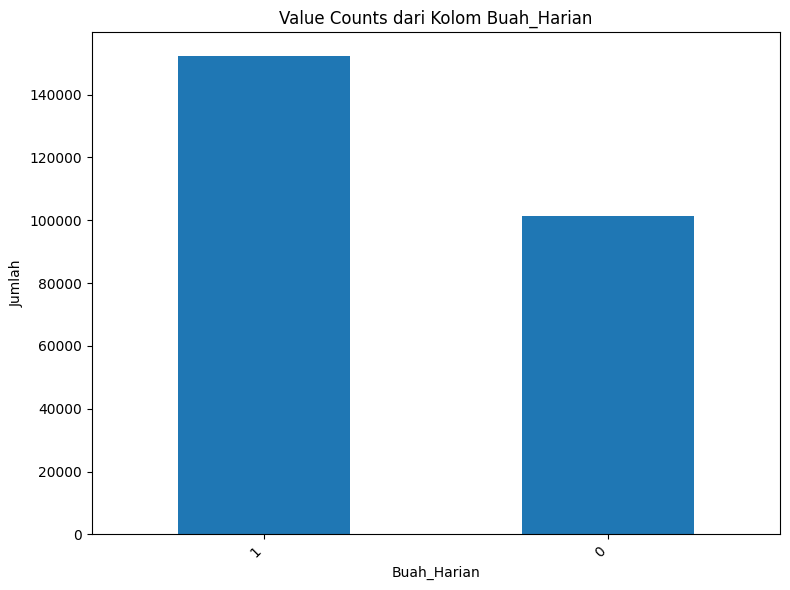

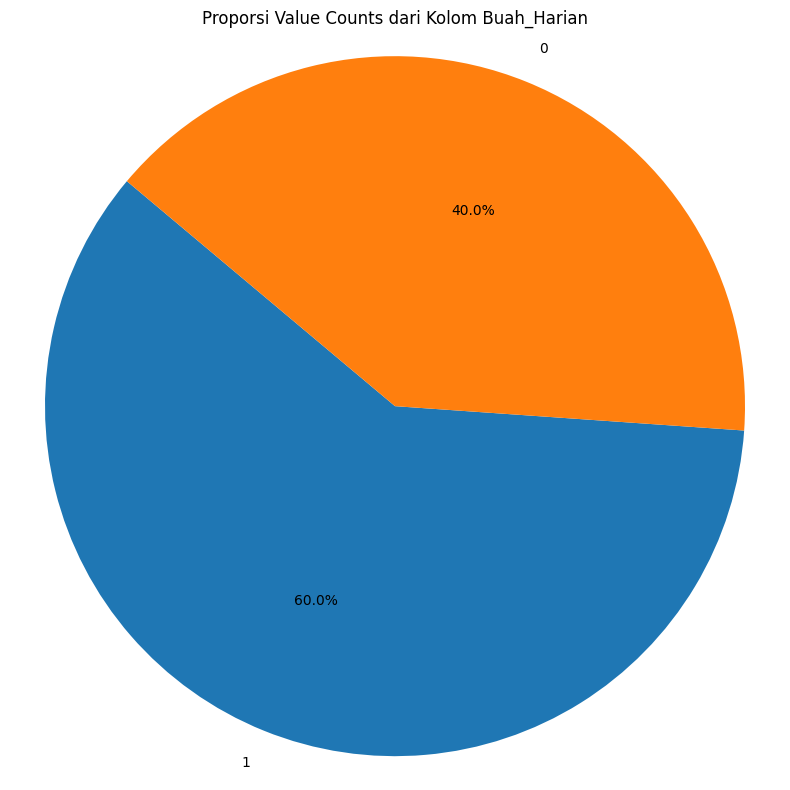

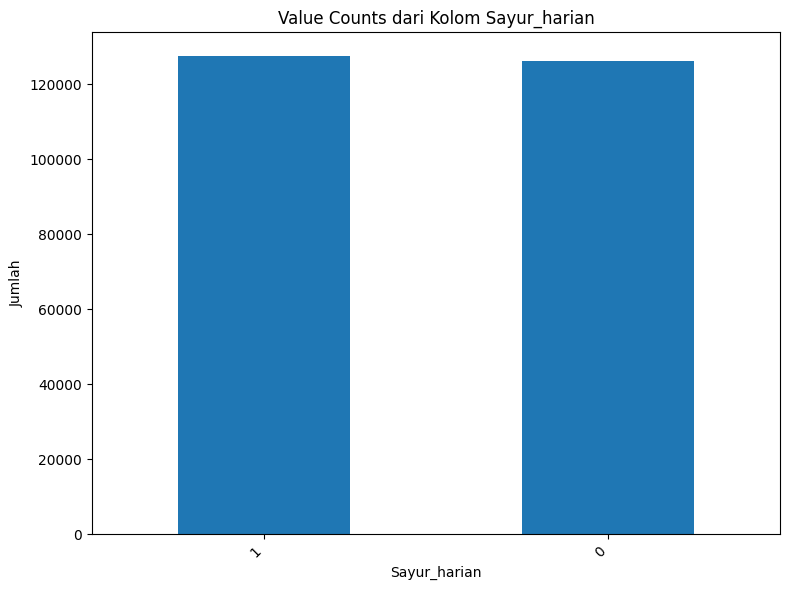

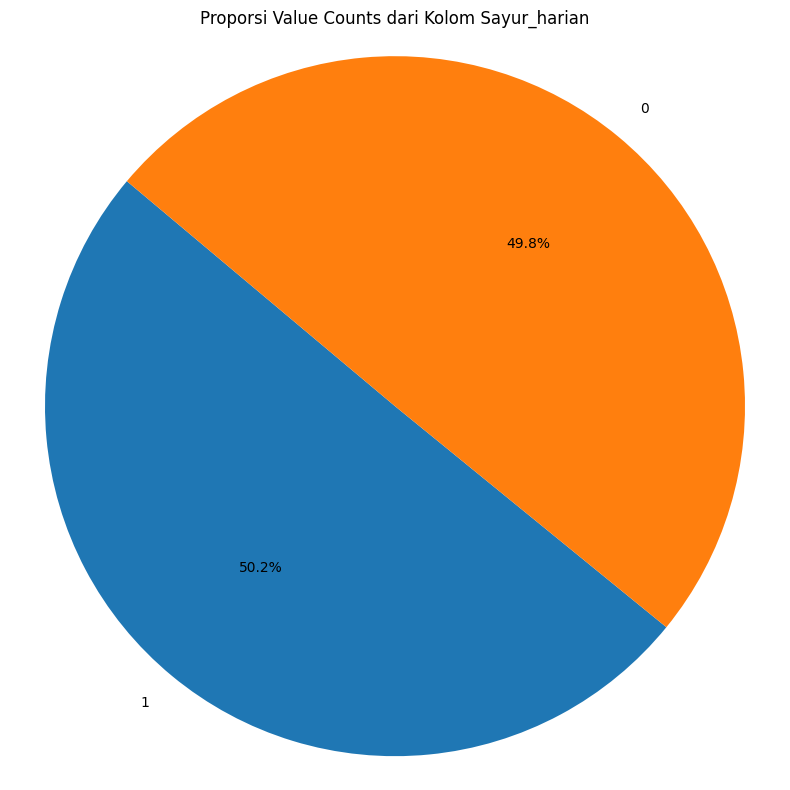

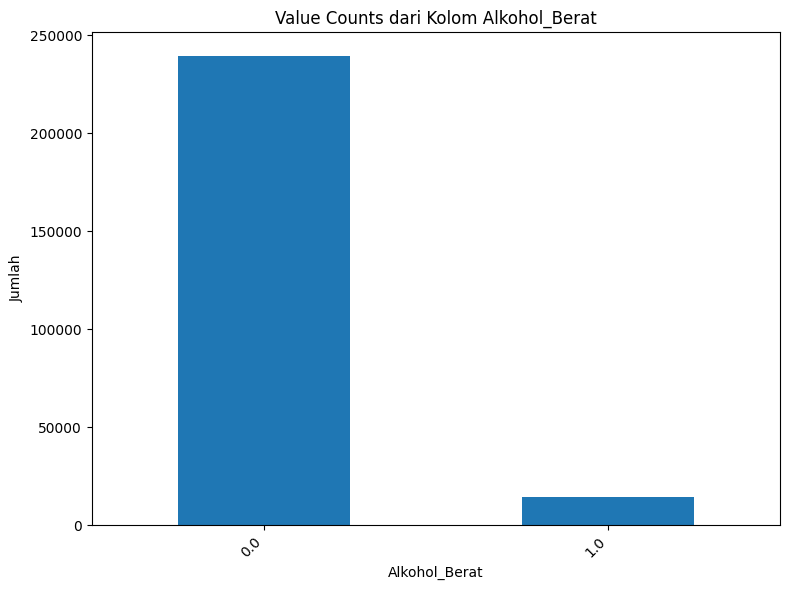

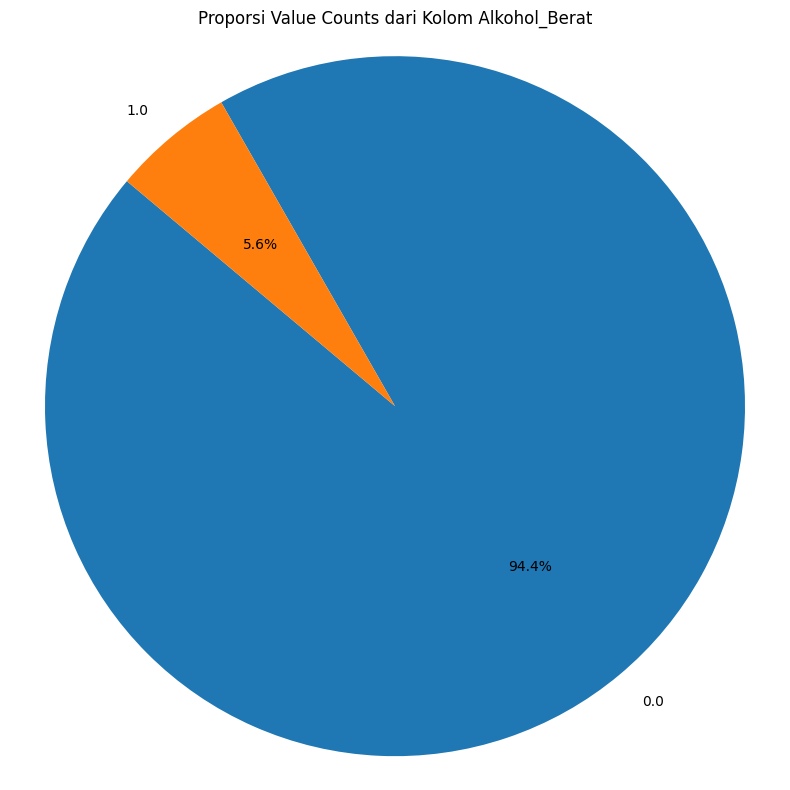

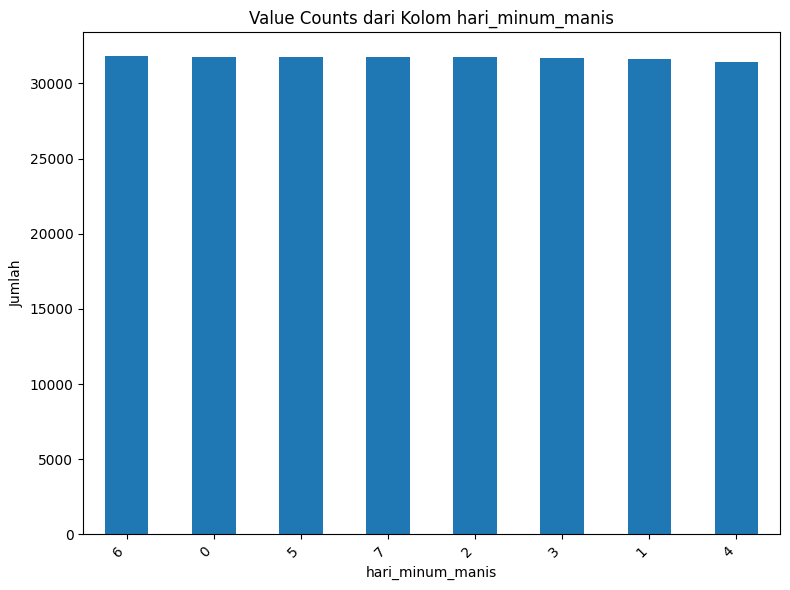

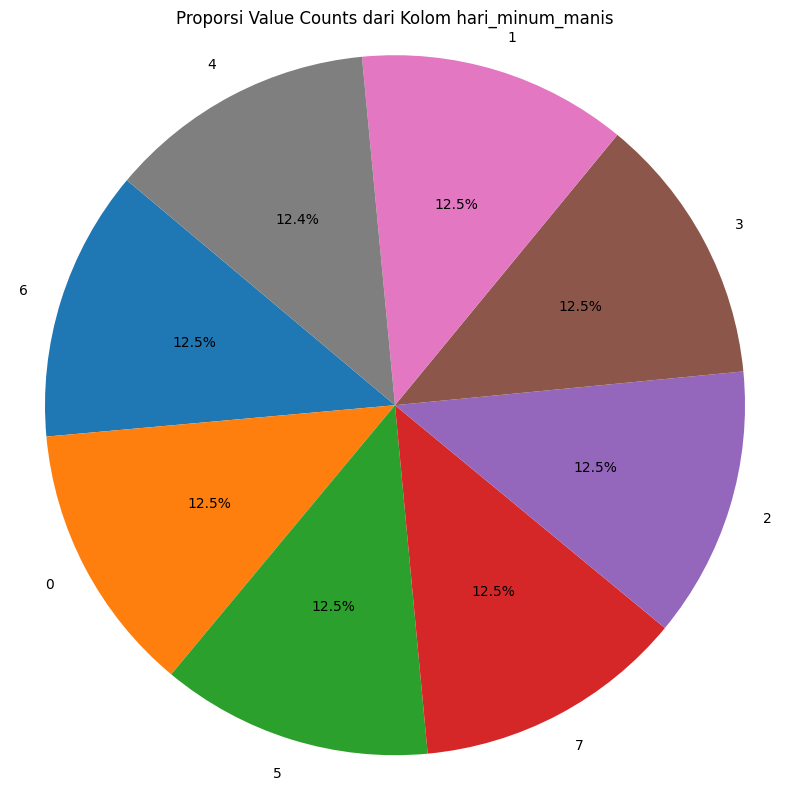

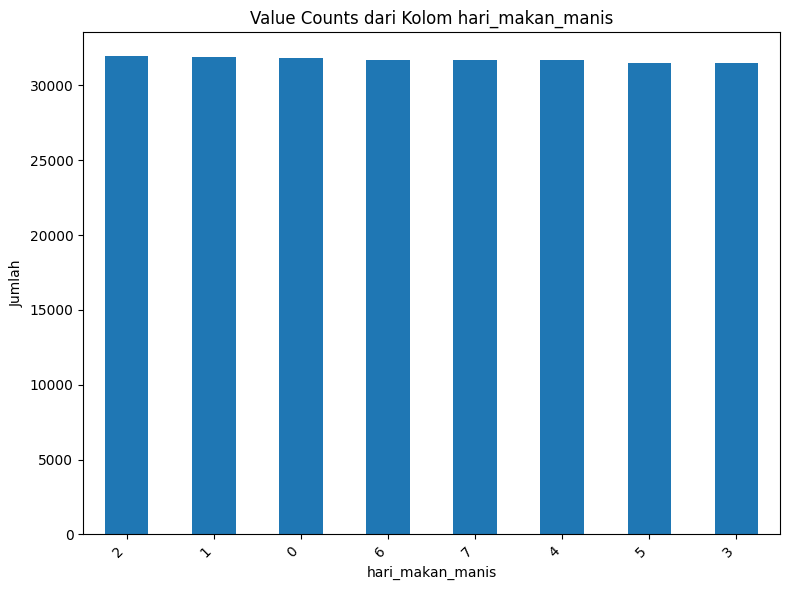

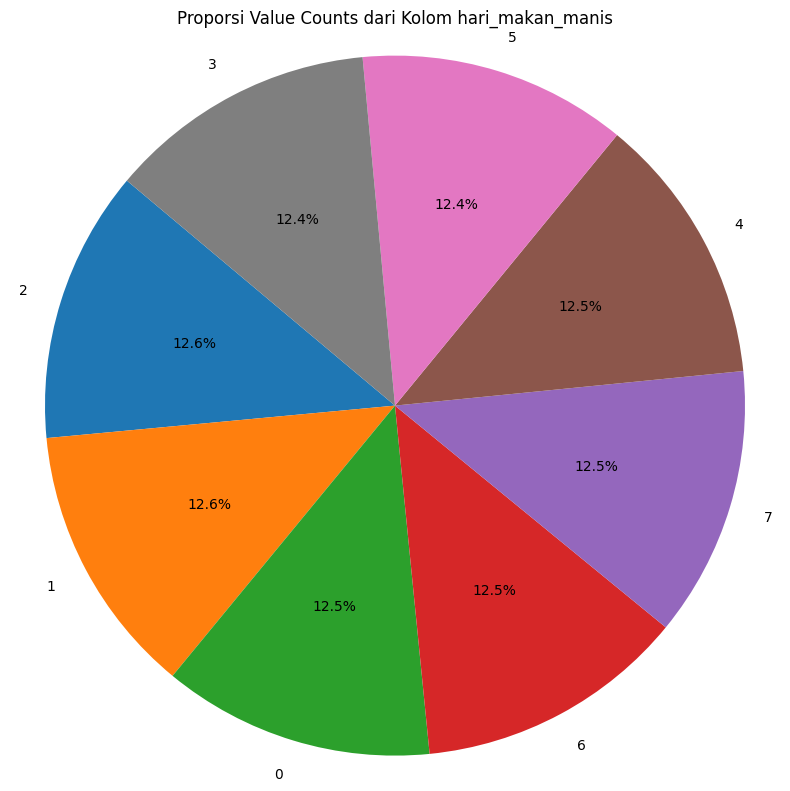

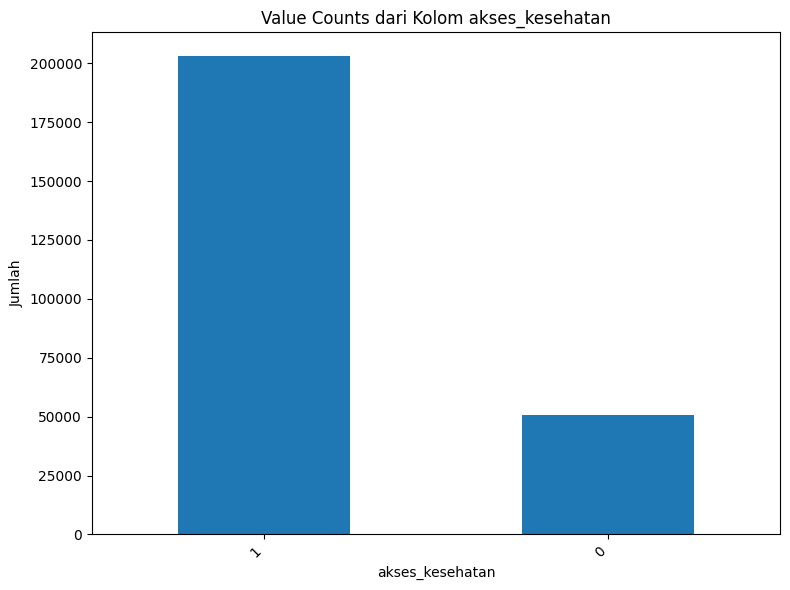

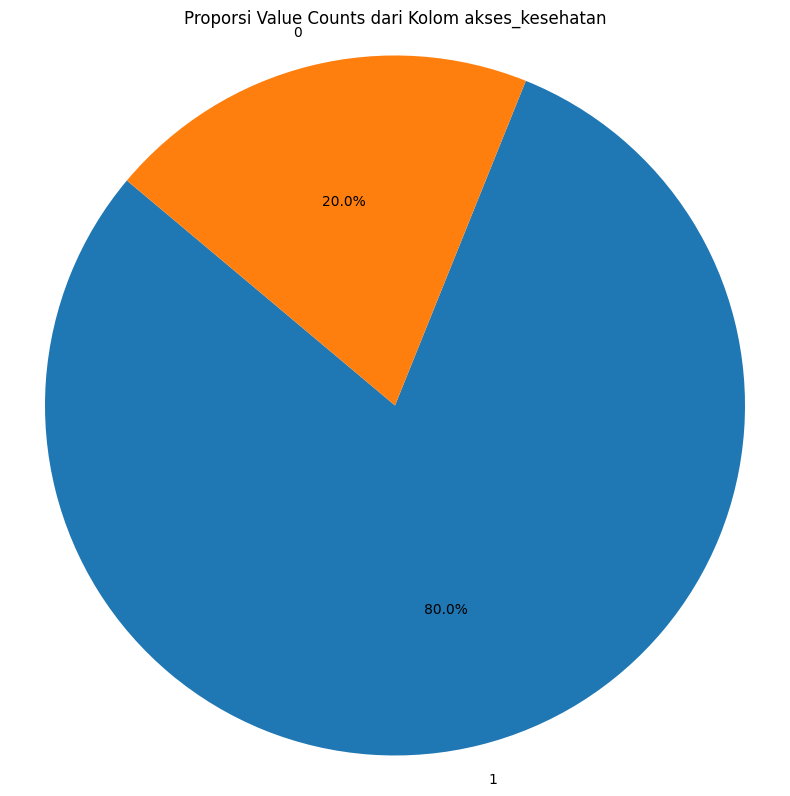

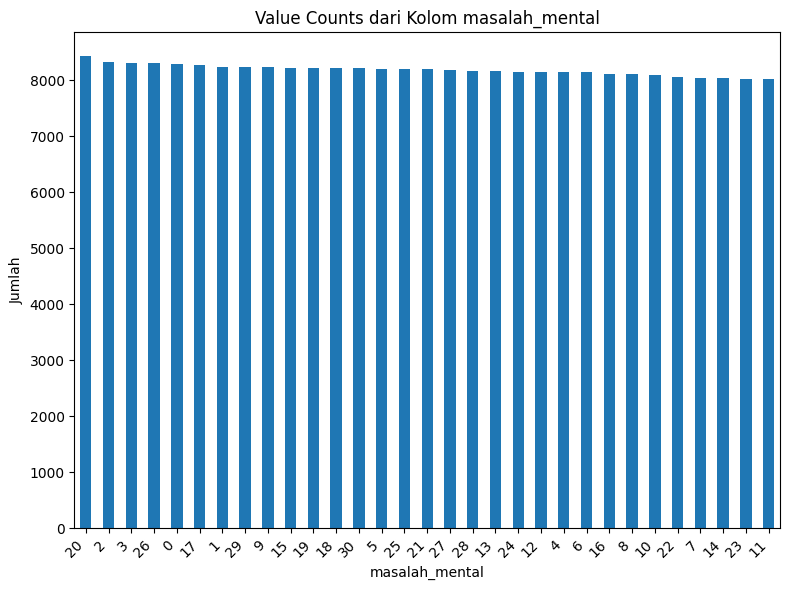

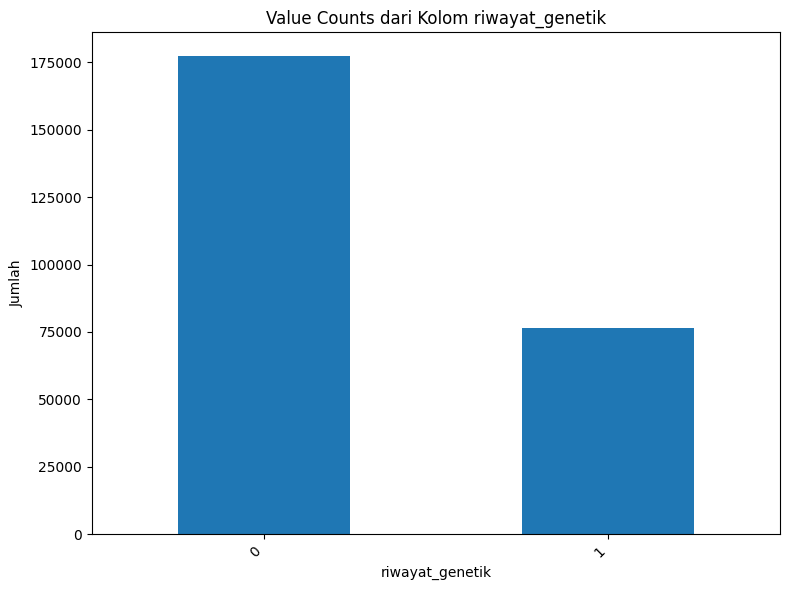

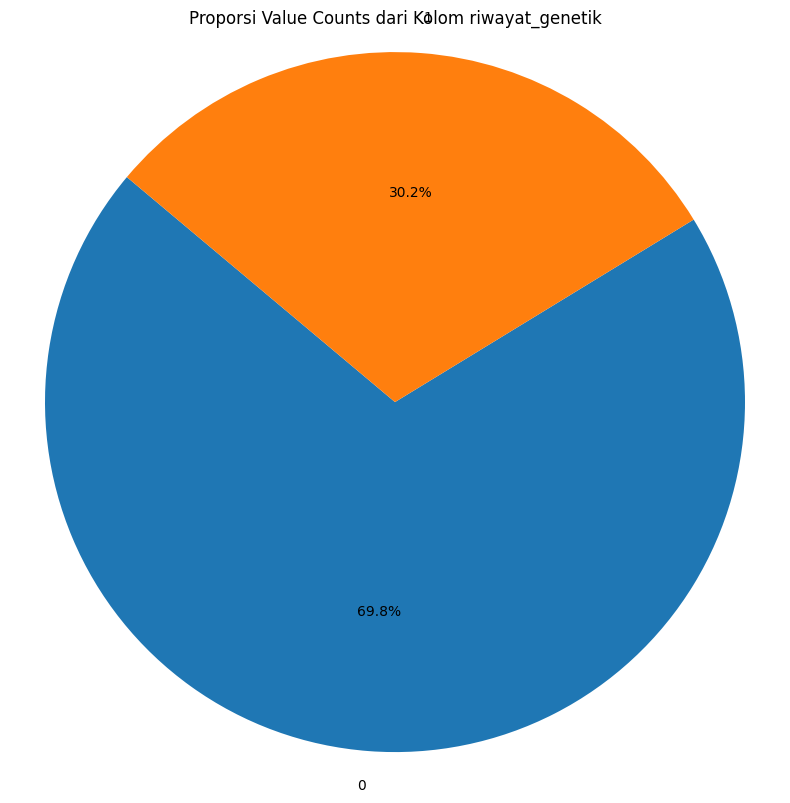

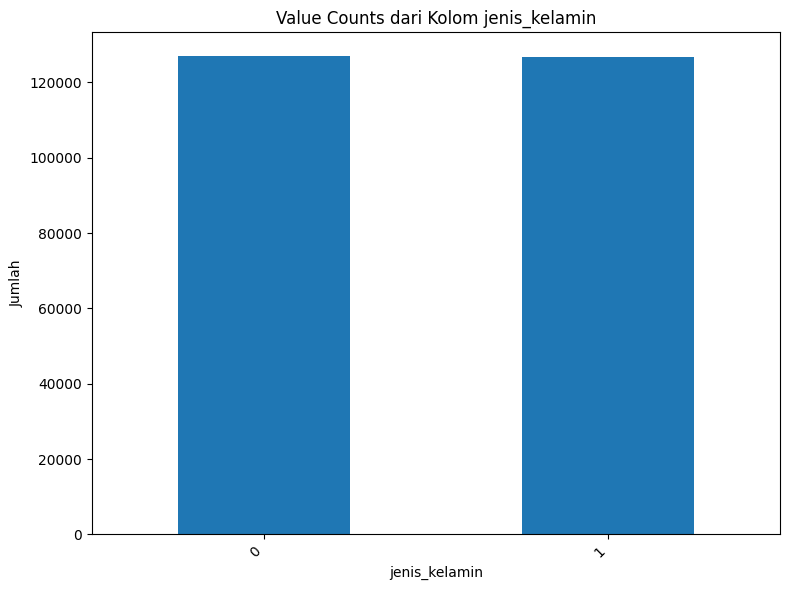

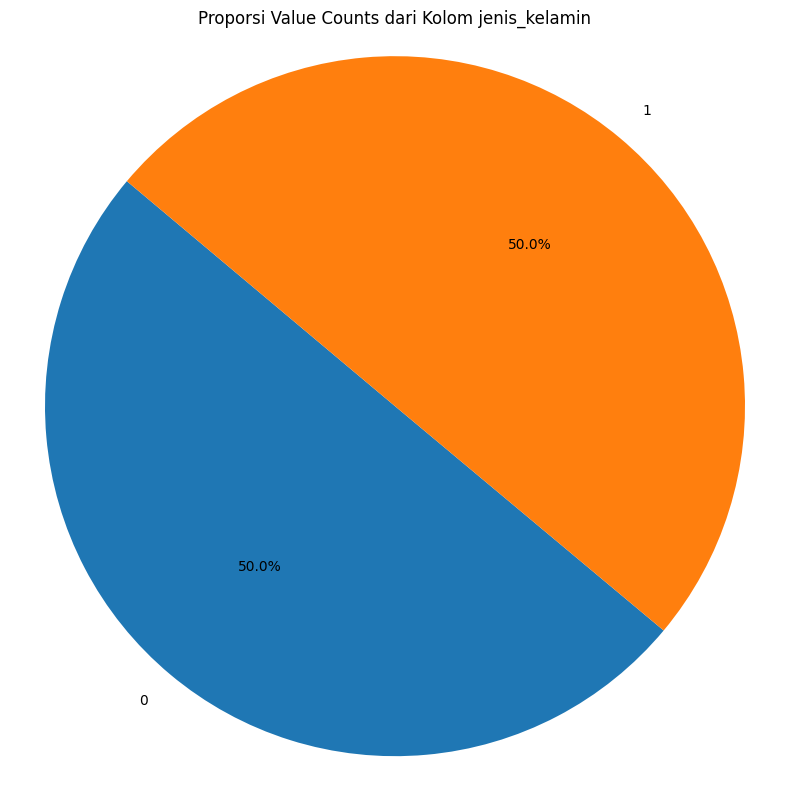

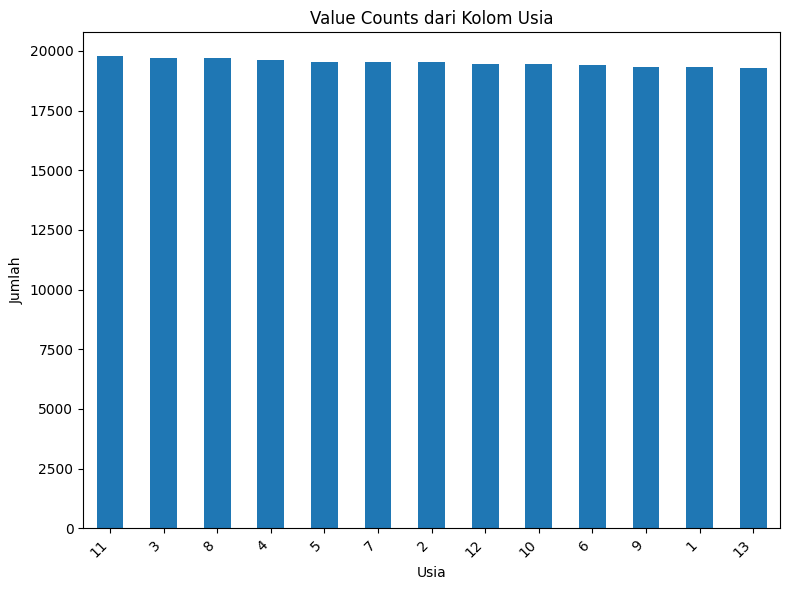

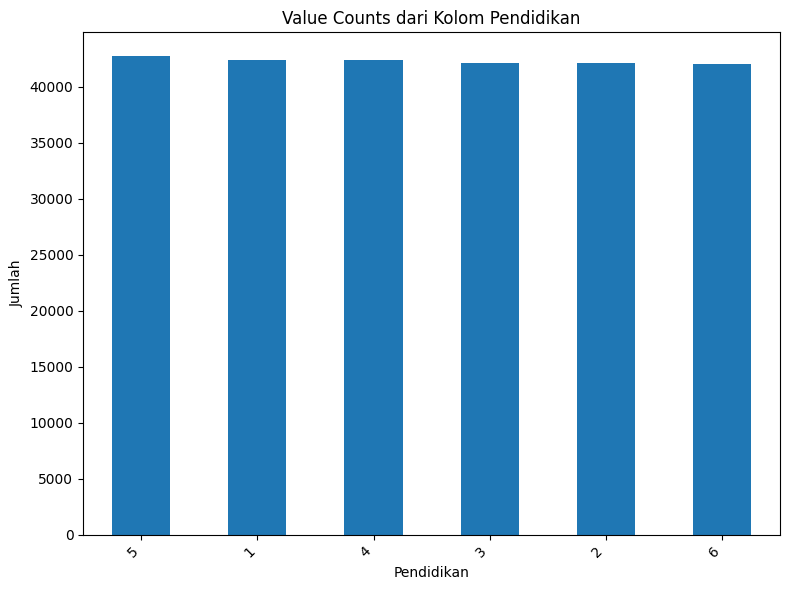

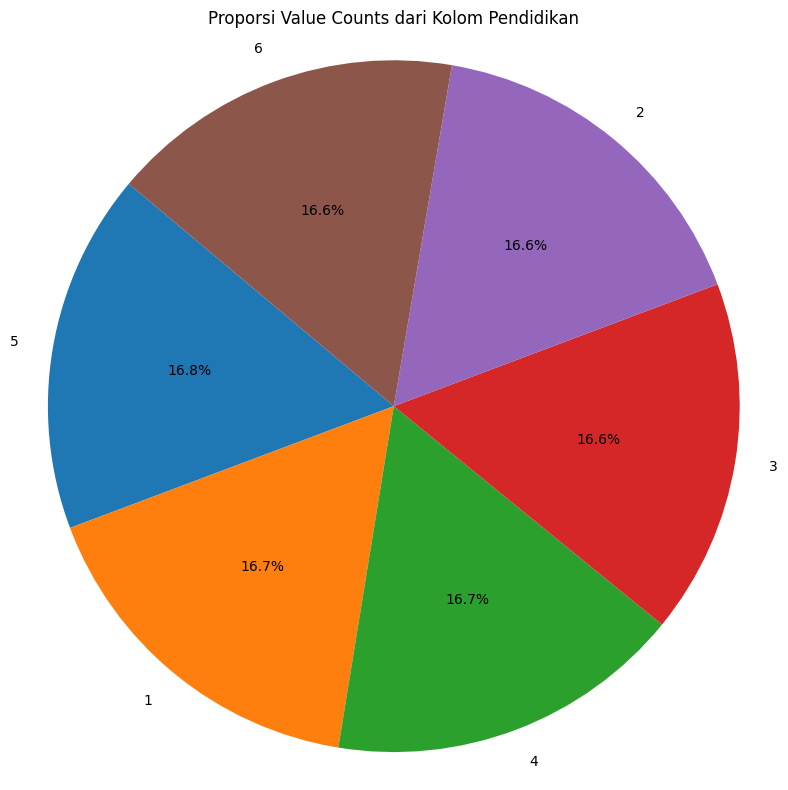

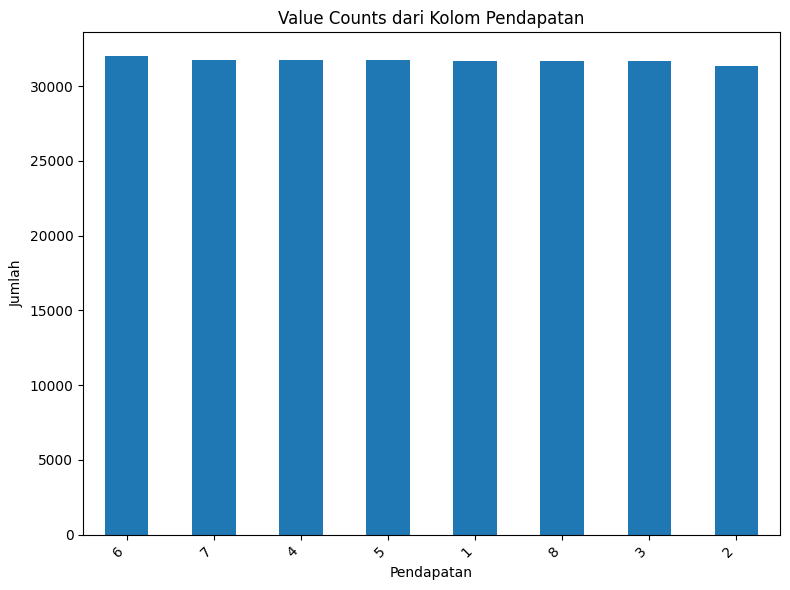

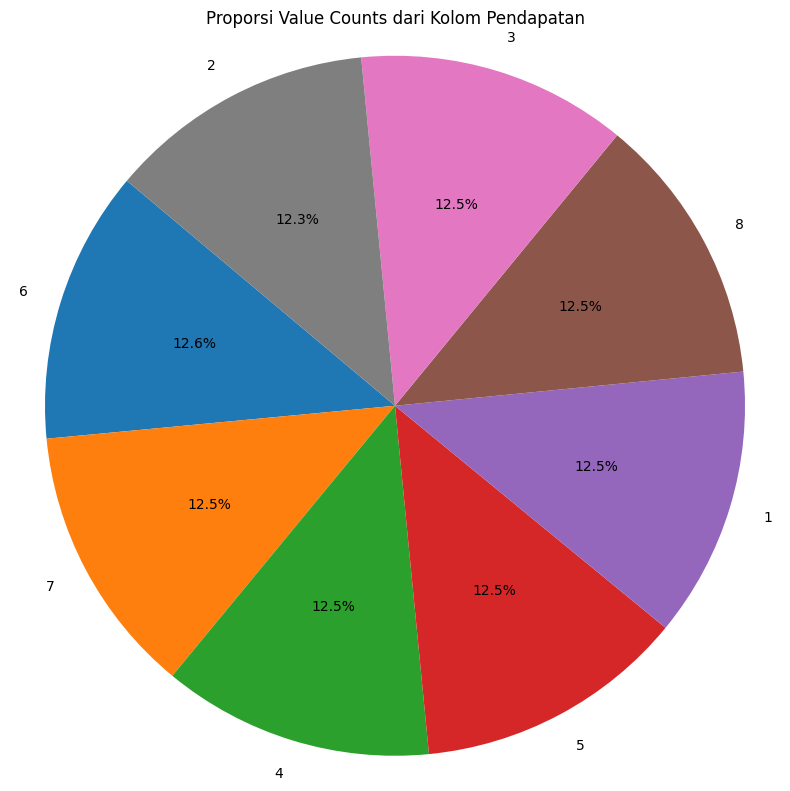

In [16]:

for column in df.columns:
    # Hitung value counts untuk kolom saat ini
    counts = df[column].value_counts()

    # Visualisasikan menggunakan bar chart
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar')
    plt.title(f'Value Counts dari Kolom {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')  # Rotasi label x jika panjang
    plt.tight_layout()  # Untuk mencegah label bertumpuk
    plt.show()


    # Anda juga bisa menambahkan visualisasi pie chart jika jumlah kategori tidak terlalu banyak
    if len(counts) <= 10:  # Batasi jumlah kategori untuk pie chart agar tetap terbaca
        plt.figure(figsize=(8, 8))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Proporsi Value Counts dari Kolom {column}')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

In [17]:
def count_outliers(df,col):
    
    q1 = df[col].quantile(0.25,interpolation='nearest')
    q2 = df[col].quantile(0.5,interpolation='nearest')
    q3 = df[col].quantile(0.75,interpolation='nearest')
    q4 = df[col].quantile(1,interpolation='nearest')

    IQR = q3 -q1
    Lower_Bound = q1 - 1.5*IQR
    Upper_Bound = q3 + 1.5*IQR

    if df[col].min() > Lower_Bound and df[col].max() < Upper_Bound:
        print("No outliers in",i)
    else:
        print("There are outliers in",i)
        x = df[df[col]<Lower_Bound][col].size
        y = df[df[col]>Upper_Bound][col].size
        a.append(i)
        print('Count of outliers are:',x+y)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

a = []
for i in numerical_cols:
    count_outliers(df,i)

There are outliers in resiko_diabetes
Count of outliers are: 39976
No outliers in gula_darah_12_bulan
There are outliers in BMI
Count of outliers are: 9847
No outliers in Perokok
There are outliers in Aktivitas_Fisik
Count of outliers are: 61759
No outliers in Buah_Harian
No outliers in Sayur_harian
There are outliers in Alkohol_Berat
Count of outliers are: 14256
No outliers in hari_minum_manis
No outliers in hari_makan_manis
There are outliers in akses_kesehatan
Count of outliers are: 50699
No outliers in masalah_mental
No outliers in riwayat_genetik
No outliers in jenis_kelamin
No outliers in Usia
No outliers in Pendidikan
No outliers in Pendapatan


In [18]:
data = df.drop('resiko_diabetes', axis = 1)
target = df['resiko_diabetes']

# Saving feature names for later use
feature_list = list(df.columns)

In [19]:
data.shape, target.shape


((253669, 16), (253669,))

In [20]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [21]:
scaled_features = scaler.transform(data)
data1 = pd.DataFrame(scaled_features,columns=df.columns[1:])
data1.head()

,gula_darah_12_bulan,BMI,Perokok,Aktivitas_Fisik,Buah_Harian,Sayur_harian,Alkohol_Berat,hari_minum_manis,hari_makan_manis,akses_kesehatan,masalah_mental,riwayat_genetik,jenis_kelamin,Usia,Pendidikan,Pendapatan
0,1.222661,1.757892,1.120919,-1.762782,0.816466,0.995363,-0.24402,-0.654720,-0.651934,0.499786,0.223488,-0.657151,-0.999247,-1.337116,1.463608,0.215628
1,-0.817888,-0.511821,1.120919,0.567285,0.816466,0.995363,-0.24402,0.217485,-0.651934,0.499786,-1.562271,-0.657151,-0.999247,-1.604698,0.877965,1.525742
2,-0.817888,-0.057879,-0.892125,-1.762782,0.816466,-1.004659,-0.24402,0.217485,-1.088040,0.499786,1.227977,-0.657151,1.000753,0.535958,-0.878965,-1.531190
3,1.222661,-0.209193,-0.892125,0.567285,-1.224791,-1.004659,-0.24402,1.089689,-0.215829,0.499786,-1.004222,-0.657151,-0.999247,-0.534370,-0.878965,-1.531190
4,-0.817888,-0.663135,-0.892125,0.567285,0.816466,0.995363,-0.24402,0.653587,0.656382,0.499786,1.004758,-0.657151,1.000753,1.606287,0.292322,-0.221077


In [22]:
train_features, test_features, train_labels, test_labels = train_test_split(data,
                                                                            target,
                                                                            test_size = 0.2,
                                                                            random_state = 42,
                                                                            stratify = target,
                                                                            shuffle = True,)


In [23]:
train_features.shape, test_features.shape

((202935, 16), (50734, 16))

In [24]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
rfC_ = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, max_features= None,min_samples_leaf= 2, criterion= 'entropy',bootstrap=True)
rfC_.fit(train_features, train_labels)

predict = rfC_.predict(test_features)

In [25]:
print(f"Akurasi: {accuracy_score(test_labels, predict)}")
print(f"Presisi: {precision_score(test_labels, predict, average='weighted')}")
print(f"Recall: {recall_score(test_labels, predict, average='weighted')}")
print(f"F1 Score: {f1_score(test_labels, predict, average='weighted')}")
print(f"Classification Report:\n{classification_report(test_labels, predict)}")
print(f"Feature Importance:\n{rfC_.feature_importances_}")

Akurasi: 0.8424133717033941
Presisi: 0.7096602888246809
Recall: 0.8424133717033941
F1 Score: 0.7703594640854871
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     42739
         1.0       0.00      0.00      0.00       926
         2.0       0.00      0.00      0.00      7069

    accuracy                           0.84     50734
   macro avg       0.28      0.33      0.30     50734
weighted avg       0.71      0.84      0.77     50734

Feature Importance:
[7.23401534e-05 8.22177130e-01 4.00100247e-02 1.04132369e-01
 3.56206846e-05 1.50030925e-04 2.92797760e-02 2.77440893e-04
 1.25121198e-03 3.30104735e-05 1.15508367e-03 3.63037248e-05
 1.07103379e-04 6.19609927e-04 1.91855646e-04 4.71088597e-04]


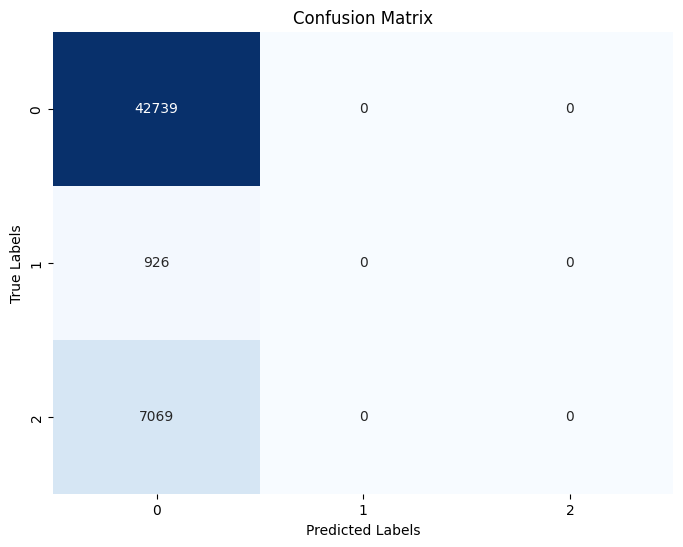

In [26]:
cm = confusion_matrix(test_labels, predict)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
'''from imblearn.over_sampling import SMOTE
from collections import Counter

# Asumsikan X adalah fitur dan y adalah target
print("Distribusi kelas sebelum oversampling:", Counter(target))

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(train_features, train_labels)
print("Distribusi kelas setelah SMOTE:", Counter(y_smote))'''

'from imblearn.over_sampling import SMOTE\nfrom collections import Counter\n\n# Asumsikan X adalah fitur dan y adalah target\nprint("Distribusi kelas sebelum oversampling:", Counter(target))\n\n# SMOTE\nsmote = SMOTE(random_state=42)\nX_smote, y_smote = smote.fit_resample(train_features, train_labels)\nprint("Distribusi kelas setelah SMOTE:", Counter(y_smote))'

In [28]:
'''from collections import Counter
from imblearn.over_sampling import ADASYN

# Asumsikan X adalah fitur dan y adalah target
print("Distribusi kelas sebelum oversampling:", Counter(target))

# SMOTE
adaysn = ADASYN(random_state=42)
X_adaysn, y_adaysn = adaysn.fit_resample(train_features, train_labels)
print("Distribusi kelas setelah ADAYSN:", Counter(y_adaysn))

print("Shape data latih sebelum ADAYSN:", train_features.shape, train_labels.shape)
print("Shape data latih setelah ADAYSN:", X_adaysn.shape, y_adaysn.shape)
print("\nDistribusi kelas target sebelum ADAYSN:\n", train_labels.value_counts())
print("\nDistribusi kelas target setelah ADAYSN:\n", pd.Series(y_adaysn).value_counts())'''

'from collections import Counter\nfrom imblearn.over_sampling import ADASYN\n\n# Asumsikan X adalah fitur dan y adalah target\nprint("Distribusi kelas sebelum oversampling:", Counter(target))\n\n# SMOTE\nadaysn = ADASYN(random_state=42)\nX_adaysn, y_adaysn = adaysn.fit_resample(train_features, train_labels)\nprint("Distribusi kelas setelah ADAYSN:", Counter(y_adaysn))\n\nprint("Shape data latih sebelum ADAYSN:", train_features.shape, train_labels.shape)\nprint("Shape data latih setelah ADAYSN:", X_adaysn.shape, y_adaysn.shape)\nprint("\nDistribusi kelas target sebelum ADAYSN:\n", train_labels.value_counts())\nprint("\nDistribusi kelas target setelah ADAYSN:\n", pd.Series(y_adaysn).value_counts())'

In [29]:
'''sns.countplot(x=pd.Series(train_labels))
plt.title('Distribusi Kelas Target Sebelum ADASYN')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.show()

# Visualisasi Distribusi Kelas Setelah Oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=pd.Series(y_adaysn))
plt.title('Distribusi Kelas Target Setelah SMOTE')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.show()'''

"sns.countplot(x=pd.Series(train_labels))\nplt.title('Distribusi Kelas Target Sebelum ADASYN')\nplt.xlabel('Kelas Target')\nplt.ylabel('Jumlah Sampel')\nplt.show()\n\n# Visualisasi Distribusi Kelas Setelah Oversampling\nplt.figure(figsize=(8, 6))\nsns.countplot(x=pd.Series(y_adaysn))\nplt.title('Distribusi Kelas Target Setelah SMOTE')\nplt.xlabel('Kelas Target')\nplt.ylabel('Jumlah Sampel')\nplt.show()"

In [30]:
'''from sklearn.metrics import accuracy_score,balanced_accuracy_score,auc,roc_auc_score
rfC_adaysn= RandomForestClassifier(n_estimators=500, max_depth= None,max_features= 'sqrt' , random_state=42,bootstrap=True)
rfC_adaysn.fit(X_adaysn, y_adaysn)

predict_adaysn = rfC_adaysn.predict(test_features)

print(f"Akurasi: {accuracy_score(test_labels, predict_adaysn)}")
print(f"Presisi: {precision_score(test_labels, predict_adaysn, average='weighted')}")
print(f"Recall: {recall_score(test_labels, predict_adaysn, average='weighted')}")
print(f"F1 Score: {f1_score(test_labels, predict_adaysn, average='weighted')}")
print(f"Balanced Accuracy: {balanced_accuracy_score(test_labels, predict_adaysn,)}")
print(f"Classification Report:\n{classification_report(test_labels, predict_adaysn)}")'''

'from sklearn.metrics import accuracy_score,balanced_accuracy_score,auc,roc_auc_score\nrfC_adaysn= RandomForestClassifier(n_estimators=500, max_depth= None,max_features= \'sqrt\' , random_state=42,bootstrap=True)\nrfC_adaysn.fit(X_adaysn, y_adaysn)\n\npredict_adaysn = rfC_adaysn.predict(test_features)\n\nprint(f"Akurasi: {accuracy_score(test_labels, predict_adaysn)}")\nprint(f"Presisi: {precision_score(test_labels, predict_adaysn, average=\'weighted\')}")\nprint(f"Recall: {recall_score(test_labels, predict_adaysn, average=\'weighted\')}")\nprint(f"F1 Score: {f1_score(test_labels, predict_adaysn, average=\'weighted\')}")\nprint(f"Balanced Accuracy: {balanced_accuracy_score(test_labels, predict_adaysn,)}")\nprint(f"Classification Report:\n{classification_report(test_labels, predict_adaysn)}")'

In [31]:
'''from sklearn.model_selection import GridSearchCV
parameters_lr = [{'n_estimators':[50,100,200,300,400], 'max_features' : ['log2', 'sqrt'], 'max_depth':[3,5,10,15]}]
rfC_ = RandomForestClassifier(random_state=123)
grid_search_lr = GridSearchCV(estimator = rfC_,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(train_features, train_labels)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)'''

'from sklearn.model_selection import GridSearchCV\nparameters_lr = [{\'n_estimators\':[50,100,200,300,400], \'max_features\' : [\'log2\', \'sqrt\'], \'max_depth\':[3,5,10,15]}]\nrfC_ = RandomForestClassifier(random_state=123)\ngrid_search_lr = GridSearchCV(estimator = rfC_,\n                           param_grid = parameters_lr,\n                           scoring = \'accuracy\',\n                           cv = 10,\n                           n_jobs = -1)\ngrid_search_lr.fit(train_features, train_labels)\nbest_accuracy_lr = grid_search_lr.best_score_\nbest_paramaeter_lr = grid_search_lr.best_params_\nprint("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))\nprint("Best Parameter of LR:", best_paramaeter_lr)'

In [32]:

import joblib
file = 'diabetes.joblib'
joblib.dump(rfC_, file)
print(f"Model Sukses disimpan sebagai {file}")

Model Sukses disimpan sebagai diabetes.joblib


In [33]:
load_model = joblib.load(file)
print(f"\nModel Random Forest berhasil dimuat kembali dari '{file}'")


Model Random Forest berhasil dimuat kembali dari 'diabetes.joblib'


In [ ]:
def prediksi_diabetes():
  # Buat fitur input untuk prediksi diabetes

  gula_darah_12_bulan = int(input("Enter gula darah 12_bulan (0 or 1): "))
  BMI = int(input("Enter BMI: "))
  Perokok = int(input("Enter Perokok (0 or 1): "))
  Aktivitas_Fisik = int(input("Enter Aktivitas Fisik (0 or 1): "))
  Buah_Harian = int(input("Enter Buah_Harian (0 or 1): "))
  Sayur_harian = int(input("Enter Sayur_harian (0 or 1): "))
  Alkohol_Berat = int(input("Enter Alkohol_Berat (0 or 1): "))
  hari_minum_manis = int(input("Enter AnyHealthcare : "))
  hari_makan_manis = int(input("Enter GenHlth: "))
  akses_kesehatan = int(input("Enter PhysHlth (0 or 1): "))
  masalah_mental = int(input("masalah_mental (1 - 31): "))
  riwayat_genetik = int(input("riwayat_genetik (0 Or 1): "))
  jenis_kelamin = int(input("Enter jenis_kelamin (0 for Female, 1 for Male): "))
  Usia = int(input("Enter Age (1-13): "))
  Pendidikan = int(input("Enter Education (1-6): "))
  Pendapatan = int(input("Enter Income (1-8): "))


  fitur = [gula_darah_12_bulan, BMI, Perokok, Aktivitas_Fisik, Buah_Harian, Sayur_harian, Alkohol_Berat,
               hari_minum_manis, hari_makan_manis, akses_kesehatan, masalah_mental, riwayat_genetik, jenis_kelamin, Usia, Pendidikan, Pendapatan]

  ft_array = np.array(fitur).reshape(1, -1)

  prediksi = rfC_.predict(ft_array)[0]
  return prediksi


  # Return the prediction result as a string
def kategori_resiko(prediksi):
    if prediksi == 0:
        return 'Tidak Beresiko'
    elif prediksi == 1:
        return 'Beresiko'
    elif prediksi == 2:
        return 'Sangat Beresiko'
    else:
        return 'Tidak Diketahui'

if __name__ == "__main__":
    prediksi_tingkat = prediksi_diabetes()
    kategori = kategori_resiko(prediksi_tingkat)
    print(f"Prediksi Resiko Diabetes: {prediksi_tingkat}")
    print(f"Kategori Resiko Diabetes: {kategori}")